In [121]:
import numpy as np
import torch
from torch import nn
import tqdm
import time

In [122]:
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split


In [123]:
torch.cuda.is_available()

False

In [124]:
## DATA PREPARATION
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))



# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print("num_train_batches = " + str(num_train_batches))
print("num_val_batches = " + str(num_val_batches))
print("num_test_batches = " + str(num_test_batches))


# Sample code to visualize the first sample in first 16 batches
# batch_num = 0
# for train_features, train_labels in train_batches:

#     if batch_num == 16:
#         break    # break here

#     batch_num = batch_num +1
#     print(f"Feature batch shape: {train_features.size()}")
#     print(f"Labels batch shape: {train_labels.size()}")

#     img = train_features[0].squeeze()
#     label = train_labels[0]
#     plt.imshow(img, cmap="gray")
#     plt.show()
#     print(f"Label: {label}")



# Sample code to plot N^2 images from the dataset
# def plot_images(XX, N, title):
#     fig, ax = plt.subplots(N, N, figsize=(8, 8))

#     for i in range(N):
#       for j in range(N):
#         ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")
#         ax[i,j].axis("off")
#     fig.suptitle(title, fontsize=24)

# plot_images(train_dataset.data[:64], 8, "First 64 Training Images" )

num_train_batches = 106
num_val_batches = 12
num_test_batches = 40


In [125]:
# for train_features in train_batches:
#     print(train_features[0][511].shape)

In [126]:
## Function to vary the number of training batches based on batch size

def data_loader(train_batch_size, test_batch_size):
    # Define dataloader objects that help to iterate over batches and samples for
    # training, validation and testing
    train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
    val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
    test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

    num_train_batches=len(train_batches)
    num_val_batches=len(val_batches)
    num_test_batches=len(test_batches)


    print("num_train_batches = " + str(num_train_batches))
    print("num_val_batches = " + str(num_val_batches))
    print("num_test_batches = " + str(num_test_batches))

    return train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches

In [127]:
# ## MODEL DEFINITION (baseline)

# class ACAIGFCN(nn.Module):

#     #Initialize model layers, add additional arguments to adjust
#     def __init__(self, input_dim, output_dim, hidden_dims):

#         self.hidden_dims = hidden_dims
#         super(ACAIGFCN, self).__init__()


#         #Define the network layer(s) and activation function(s)

#         self.input_layer = nn.Linear(input_dim, hidden_dims[0])

#         self.hidden_layers = nn.ModuleList()
#         for k in range(len(hidden_dims) - 1):
#             self.hidden_layers.append(nn.Linear(hidden_dims[k], hidden_dims[k + 1]))

#         self.output_layer = nn.Linear(hidden_dims[-1], output_dim)


#     def forward(self, input):
#         #Define how your model propagates the input through the network

#         x = torch.nn.functional.relu(self.input_layer(input))

#         for k in range(len(self.hidden_dims) - 1):
#             x = torch.nn.functional.relu(self.hidden_layers[k](x))

#         output = self.output_layer(x)



#         return output

In [128]:
# ## PARAMETERS (baseline)
# # Initialize neural network model with input, output and hidden layer dimensions
# model = ACAIGFCN(input_dim = 784, output_dim = 10, hidden_dims = [400, 400]) # <--- <---
# print(model)

# # Define the learning rate and epochs number
# learning_rate = 0.03 # <---
# epochs = 40 # <---

# # Define loss function  and optimizer
# loss_func = torch.nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # <--- Use optimizers from torch.optim

# ## Re-adjust number of training batches
# # set batch sizes
# train_batch_size = 512 # <--- Define train batch size
# test_batch_size  = 256 #Define test batch size (can be larger than train batch size)

# train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches = data_loader(train_batch_size, test_batch_size)

# # Identify tracked values
# train_loss_list = np.zeros((epochs,))
# validation_accuracy_list = np.zeros((epochs,))

# # For PyTorch GPU version
# if torch.cuda.is_available():
#   model.cuda()

In [129]:
## MODEL DEFINITION (FCN)

class ACAIGFCN(nn.Module):

    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden_dims, dropout):

        self.hidden_dims = hidden_dims
        super(ACAIGFCN, self).__init__()


        #Define the network layer(s) and activation function(s)

        self.input_layer = nn.Linear(input_dim, hidden_dims[0])

        self.dropout_after_input = nn.Dropout(dropout)
        print(dropout)

        self.hidden_layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        for k in range(len(hidden_dims) - 1):
            self.hidden_layers.append(nn.Linear(hidden_dims[k], hidden_dims[k + 1]))
            self.dropouts.append(nn.Dropout(dropout))

        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)


    def forward(self, input):
        #Define how your model propagates the input through the network

        x = torch.nn.functional.relu(self.input_layer(input))

        x = self.dropout_after_input(x)

        for k in range(len(self.hidden_dims) - 1):
            x = torch.nn.functional.relu(self.hidden_layers[k](x))

            x = self.dropouts[k](x)

        output = self.output_layer(x)



        return output

In [130]:
# ## CNN MODEL Definition

# class CNNModel(torch.nn.Module):

#     def __init__(self):

#         super(CNNModel, self).__init__()

#         self.cnn1 = torch.nn.Conv1d(in_channels = 512, out_channels = 1, kernel_size=5, stride=1, padding=2)

#         self.avgpool1 = torch.nn.AvgPool1d(kernel_size=2)

#         self.cnn2 = torch.nn.Conv1d(in_channels=1, out_channels=512, kernel_size=5, stride=1, padding=2)

#         self.avgpool2 = torch.nn.AvgPool1d(kernel_size=2)

#         self.fc1 = torch.nn.Linear(196, 10)


#     def forward(self, input):

#         x = self.cnn1(input)

#         x = self.avgpool1(x)

#         x = self.cnn2(x)

#         x = self.avgpool2(x)

#         x = self.fc1(x)

#         output = torch.nn.functional.relu(x)

#         return output

In [131]:
## CNN MODEL Definition (2D convolution)

class CNNModel(torch.nn.Module):

    def __init__(self, cnn_num_filters):

        super(CNNModel, self).__init__()

        self.cnn1 = torch.nn.Conv2d(in_channels = 1, out_channels = cnn_num_filters, kernel_size=5, stride=1, padding=2)

        self.avgpool1 = torch.nn.AvgPool2d(kernel_size=2)

        self.cnn2 = torch.nn.Conv2d(in_channels=cnn_num_filters, out_channels=32, kernel_size=5, stride=1, padding=2)

        self.avgpool2 = torch.nn.AvgPool2d(kernel_size=2)

        self.fc1 = torch.nn.Linear(7, 10)


    def forward(self, input):

        x = self.cnn1(input)

        x = self.avgpool1(x)

        x = self.cnn2(x)

        x = self.avgpool2(x)

        x = self.fc1(x)

        output = torch.nn.functional.relu(x)

        return output

In [132]:
## DEFINE INITIALIZATION of WEIGHTS

# def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.normal(m.weight)

In [133]:
## PARAMETERS (FCN)
neuron_layers = [158, 158] # <---
dropout_p = 0.2 # <---

# Initialize neural network model with input, output and hidden layer dimensions
model = ACAIGFCN(input_dim = 784, output_dim = 10, hidden_dims = neuron_layers, dropout = dropout_p)
print(model)

# Define the learning rate and epochs number
learning_rate = 0.001 # <---
epochs = 40 # <---

# Define loss function  and optimizer
loss_func = torch.nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) # <--- Use optimizers from torch.optim

# Initialize weights of all FCN layers
# model.apply(init_weights)

## Re-adjust number of training batches
# set batch sizes
train_batch_size = 512 # <--- Define train batch size
test_batch_size  = 256 # Define test batch size (can be larger than train batch size)

train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches = data_loader(train_batch_size, test_batch_size)

# Identify tracked values
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))

# For PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

0.2
ACAIGFCN(
  (input_layer): Linear(in_features=784, out_features=158, bias=True)
  (dropout_after_input): Dropout(p=0.2, inplace=False)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=158, out_features=158, bias=True)
  )
  (dropouts): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
  )
  (output_layer): Linear(in_features=158, out_features=10, bias=True)
)
num_train_batches = 106
num_val_batches = 12
num_test_batches = 40


In [149]:
## PARAMETERS (CNN)
cnn_num_filters = 4 # <---
# dropout_p = 0.2 # <---

# Initialize neural network model with input, output and hidden layer dimensions
cnn_model = CNNModel(cnn_num_filters)
print(cnn_model)

# Define the learning rate and epochs number
learning_rate = 0.001 # <---
epochs = 40 # <---

# Define loss function  and optimizer
loss_func = torch.nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn
optimizer = torch.optim.Adam(cnn_model.parameters(), lr = learning_rate) # <--- Use optimizers from torch.optim

# Initialize weights of all FCN layers
# model.apply(init_weights)

## Re-adjust number of training batches
# set batch sizes
train_batch_size = 512 # <--- Define train batch size
test_batch_size  = 256 # Define test batch size (can be larger than train batch size)

train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches = data_loader(train_batch_size, test_batch_size)

# Identify tracked values
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))

# For PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

CNNModel(
  (cnn1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (cnn2): Conv2d(4, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=7, out_features=10, bias=True)
)
num_train_batches = 106
num_val_batches = 12
num_test_batches = 40


In [109]:
## TRAIN FCN model

# Re-initialize tracked values
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))


start = time.time()

# Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm.trange(epochs):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          train_features = train_features.cuda()
          train_labels = train_labels.cuda()

        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        train_outputs = model(train_features)
        # print(train_outputs.shape)
        # print(train_labels.shape)
        loss = loss_func(train_outputs, train_labels)
        train_loss_list[epoch] += loss.item() / num_train_batches

        # Perform optimization, back propagation
        loss.backward()
        optimizer.step()

    # Record loss for the epoch (ALREADY DONE ABOVE)

    # ACAIGFCN Validation
    for val_features, val_labels in val_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          val_features = val_features.cuda()
          val_labels = val_labels.cuda()

        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (targets)
            # and compute accuracy
            val_outputs = model(val_features)
            correct = (torch.argmax(val_outputs, dim = 1) == val_labels).type(torch.FloatTensor)
            validation_accuracy_list[epoch] += correct.mean() / num_val_batches

    # Record accuracy for the epoch; print training loss, validation accuracy
    # print("Epoch: "+ str(epoch) +"; Validation Accuracy:" + str(val_acc/num_val_batches*100) + '%')
    print("Epoch: "+ str(epoch))
    print("Training Loss:" + str(round(train_loss_list[epoch], 2)))
    print("Validation Accuracy:" + str(round(validation_accuracy_list[epoch] * 100, 2)) + '%')


end = time.time()
runtime = end - start

  2%|▎         | 1/40 [00:13<09:04, 13.96s/it]

Epoch: 0
Training Loss:0.71
Validation Accuracy:84.22%


  5%|▌         | 2/40 [00:27<08:45, 13.82s/it]

Epoch: 1
Training Loss:0.43
Validation Accuracy:86.09%


  8%|▊         | 3/40 [00:41<08:29, 13.78s/it]

Epoch: 2
Training Loss:0.38
Validation Accuracy:87.21%


 10%|█         | 4/40 [00:55<08:15, 13.77s/it]

Epoch: 3
Training Loss:0.36
Validation Accuracy:87.97%


 12%|█▎        | 5/40 [01:08<08:01, 13.76s/it]

Epoch: 4
Training Loss:0.34
Validation Accuracy:87.75%


 15%|█▌        | 6/40 [01:22<07:46, 13.72s/it]

Epoch: 5
Training Loss:0.32
Validation Accuracy:88.19%


 18%|█▊        | 7/40 [01:36<07:32, 13.71s/it]

Epoch: 6
Training Loss:0.31
Validation Accuracy:88.67%


 20%|██        | 8/40 [01:50<07:19, 13.74s/it]

Epoch: 7
Training Loss:0.3
Validation Accuracy:88.59%


 22%|██▎       | 9/40 [02:03<07:07, 13.79s/it]

Epoch: 8
Training Loss:0.29
Validation Accuracy:88.99%


 25%|██▌       | 10/40 [02:17<06:55, 13.84s/it]

Epoch: 9
Training Loss:0.28
Validation Accuracy:88.75%


 28%|██▊       | 11/40 [02:31<06:41, 13.84s/it]

Epoch: 10
Training Loss:0.27
Validation Accuracy:89.03%


 30%|███       | 12/40 [02:45<06:27, 13.83s/it]

Epoch: 11
Training Loss:0.27
Validation Accuracy:88.8%


 32%|███▎      | 13/40 [02:59<06:13, 13.82s/it]

Epoch: 12
Training Loss:0.26
Validation Accuracy:89.31%


 35%|███▌      | 14/40 [03:13<06:00, 13.88s/it]

Epoch: 13
Training Loss:0.25
Validation Accuracy:89.32%


 38%|███▊      | 15/40 [03:27<05:47, 13.88s/it]

Epoch: 14
Training Loss:0.25
Validation Accuracy:89.6%


 40%|████      | 16/40 [03:41<05:32, 13.87s/it]

Epoch: 15
Training Loss:0.25
Validation Accuracy:89.7%


 42%|████▎     | 17/40 [03:54<05:18, 13.84s/it]

Epoch: 16
Training Loss:0.24
Validation Accuracy:89.68%


 45%|████▌     | 18/40 [04:08<05:04, 13.82s/it]

Epoch: 17
Training Loss:0.24
Validation Accuracy:89.65%


 48%|████▊     | 19/40 [04:22<04:49, 13.80s/it]

Epoch: 18
Training Loss:0.23
Validation Accuracy:89.83%


 50%|█████     | 20/40 [04:36<04:36, 13.85s/it]

Epoch: 19
Training Loss:0.23
Validation Accuracy:89.66%


 52%|█████▎    | 21/40 [04:50<04:22, 13.83s/it]

Epoch: 20
Training Loss:0.22
Validation Accuracy:89.74%


 55%|█████▌    | 22/40 [05:03<04:08, 13.83s/it]

Epoch: 21
Training Loss:0.22
Validation Accuracy:89.63%


 57%|█████▊    | 23/40 [05:17<03:54, 13.81s/it]

Epoch: 22
Training Loss:0.21
Validation Accuracy:90.06%


 60%|██████    | 24/40 [05:31<03:40, 13.79s/it]

Epoch: 23
Training Loss:0.21
Validation Accuracy:90.25%


 62%|██████▎   | 25/40 [05:45<03:26, 13.78s/it]

Epoch: 24
Training Loss:0.21
Validation Accuracy:89.94%


 65%|██████▌   | 26/40 [05:59<03:13, 13.81s/it]

Epoch: 25
Training Loss:0.2
Validation Accuracy:90.07%


 68%|██████▊   | 27/40 [06:12<02:59, 13.82s/it]

Epoch: 26
Training Loss:0.2
Validation Accuracy:89.59%


 70%|███████   | 28/40 [06:26<02:45, 13.83s/it]

Epoch: 27
Training Loss:0.2
Validation Accuracy:89.95%


 72%|███████▎  | 29/40 [06:40<02:32, 13.82s/it]

Epoch: 28
Training Loss:0.19
Validation Accuracy:90.01%


 75%|███████▌  | 30/40 [06:54<02:17, 13.75s/it]

Epoch: 29
Training Loss:0.19
Validation Accuracy:90.21%


 78%|███████▊  | 31/40 [07:07<02:03, 13.72s/it]

Epoch: 30
Training Loss:0.19
Validation Accuracy:89.91%


 80%|████████  | 32/40 [07:21<01:49, 13.71s/it]

Epoch: 31
Training Loss:0.19
Validation Accuracy:89.9%


 82%|████████▎ | 33/40 [07:35<01:36, 13.78s/it]

Epoch: 32
Training Loss:0.18
Validation Accuracy:90.13%


 85%|████████▌ | 34/40 [07:49<01:22, 13.76s/it]

Epoch: 33
Training Loss:0.18
Validation Accuracy:90.03%


 88%|████████▊ | 35/40 [08:02<01:08, 13.77s/it]

Epoch: 34
Training Loss:0.18
Validation Accuracy:90.21%


 90%|█████████ | 36/40 [08:16<00:55, 13.83s/it]

Epoch: 35
Training Loss:0.17
Validation Accuracy:90.18%


 92%|█████████▎| 37/40 [08:30<00:41, 13.84s/it]

Epoch: 36
Training Loss:0.17
Validation Accuracy:90.14%


 95%|█████████▌| 38/40 [08:44<00:27, 13.86s/it]

Epoch: 37
Training Loss:0.17
Validation Accuracy:90.13%


 98%|█████████▊| 39/40 [08:58<00:13, 13.94s/it]

Epoch: 38
Training Loss:0.17
Validation Accuracy:89.98%


100%|██████████| 40/40 [09:12<00:00, 13.81s/it]

Epoch: 39
Training Loss:0.17
Validation Accuracy:90.1%


In [150]:
## Train CNN model

# Re-initialize tracked values
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))



start = time.time()

# Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm.trange(epochs):

    k = 1
    # CNN Training
    for train_features, train_labels in train_batches:

        if k == num_train_batches:
            break
        k += 1

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          train_features = train_features.cuda()
          train_labels = train_labels.cuda()

        # Set model into training mode
        cnn_model.train()

        # Reshape images into a vector
        # train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        train_outputs = cnn_model(train_features)
        # print(torch.mean(train_outputs, dim=[1, 2]).shape)
        train_outputs = torch.mean(train_outputs, dim=[1, 2])
        # train_outputs = train_outputs[:, 0, 0, :]
        # print(train_outputs.shape)
        # print(train_labels.shape)
        loss = loss_func(train_outputs, train_labels)
        train_loss_list[epoch] += loss.item() / (num_train_batches - 1)

        # Perform optimization, back propagation
        loss.backward()
        optimizer.step()

    # Record loss for the epoch (ALREADY DONE ABOVE)

    k = 1
    # CNN Validation
    for val_features, val_labels in val_batches:

        if k == num_val_batches:
            break
        k += 1

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          val_features = val_features.cuda()
          val_labels = val_labels.cuda()

        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            cnn_model.eval()

            # Reshape validation images into a vector
            # val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (targets)
            # and compute accuracy
            val_outputs = cnn_model(val_features)
            val_outputs = torch.mean(val_outputs, dim=[1, 2])
            # val_outputs = val_outputs[:, 0, 0, :]
            # print(val_outputs.shape)
            # print(val_labels.shape)
            correct = (torch.argmax(val_outputs, dim = 1) == val_labels).type(torch.FloatTensor)
            validation_accuracy_list[epoch] += correct.mean() / (num_val_batches - 1)

    # Record accuracy for the epoch; print training loss, validation accuracy
    # print("Epoch: "+ str(epoch) +"; Validation Accuracy:" + str(val_acc/num_val_batches*100) + '%')
    print("Epoch: "+ str(epoch))
    print("Training Loss:" + str(round(train_loss_list[epoch], 2)))
    print("Validation Accuracy:" + str(round(validation_accuracy_list[epoch] * 100, 2)) + '%')


end = time.time()
cnn_runtime = end - start

  2%|▎         | 1/40 [00:15<10:13, 15.73s/it]

Epoch: 0
Training Loss:2.09
Validation Accuracy:39.58%


  5%|▌         | 2/40 [00:31<09:52, 15.59s/it]

Epoch: 1
Training Loss:1.43
Validation Accuracy:54.07%


  8%|▊         | 3/40 [00:46<09:34, 15.54s/it]

Epoch: 2
Training Loss:1.25
Validation Accuracy:57.3%


 10%|█         | 4/40 [01:02<09:16, 15.46s/it]

Epoch: 3
Training Loss:1.17
Validation Accuracy:59.16%


 12%|█▎        | 5/40 [01:17<08:59, 15.42s/it]

Epoch: 4
Training Loss:1.12
Validation Accuracy:61.7%


 15%|█▌        | 6/40 [01:32<08:42, 15.38s/it]

Epoch: 5
Training Loss:1.06
Validation Accuracy:63.48%


 18%|█▊        | 7/40 [01:48<08:27, 15.38s/it]

Epoch: 6
Training Loss:1.01
Validation Accuracy:64.67%


 20%|██        | 8/40 [02:03<08:11, 15.37s/it]

Epoch: 7
Training Loss:0.97
Validation Accuracy:66.1%


 22%|██▎       | 9/40 [02:18<07:56, 15.38s/it]

Epoch: 8
Training Loss:0.93
Validation Accuracy:67.03%


 25%|██▌       | 10/40 [02:34<07:42, 15.40s/it]

Epoch: 9
Training Loss:0.92
Validation Accuracy:67.51%


 28%|██▊       | 11/40 [02:50<07:29, 15.51s/it]

Epoch: 10
Training Loss:0.9
Validation Accuracy:67.74%


 30%|███       | 12/40 [03:05<07:13, 15.49s/it]

Epoch: 11
Training Loss:0.89
Validation Accuracy:68.55%


 32%|███▎      | 13/40 [03:20<06:56, 15.43s/it]

Epoch: 12
Training Loss:0.88
Validation Accuracy:68.52%


 35%|███▌      | 14/40 [03:36<06:40, 15.39s/it]

Epoch: 13
Training Loss:0.87
Validation Accuracy:68.75%


 38%|███▊      | 15/40 [03:51<06:23, 15.35s/it]

Epoch: 14
Training Loss:0.87
Validation Accuracy:68.71%


 40%|████      | 16/40 [04:06<06:07, 15.30s/it]

Epoch: 15
Training Loss:0.86
Validation Accuracy:69.03%


 42%|████▎     | 17/40 [04:21<05:51, 15.27s/it]

Epoch: 16
Training Loss:0.86
Validation Accuracy:69.41%


 45%|████▌     | 18/40 [04:36<05:35, 15.27s/it]

Epoch: 17
Training Loss:0.85
Validation Accuracy:69.12%


 48%|████▊     | 19/40 [04:52<05:20, 15.25s/it]

Epoch: 18
Training Loss:0.85
Validation Accuracy:69.48%


 50%|█████     | 20/40 [05:07<05:05, 15.26s/it]

Epoch: 19
Training Loss:0.84
Validation Accuracy:69.48%


 52%|█████▎    | 21/40 [05:22<04:49, 15.25s/it]

Epoch: 20
Training Loss:0.84
Validation Accuracy:68.77%


 55%|█████▌    | 22/40 [05:37<04:34, 15.26s/it]

Epoch: 21
Training Loss:0.83
Validation Accuracy:69.9%


 57%|█████▊    | 23/40 [05:53<04:20, 15.31s/it]

Epoch: 22
Training Loss:0.83
Validation Accuracy:70.05%


 60%|██████    | 24/40 [06:08<04:05, 15.34s/it]

Epoch: 23
Training Loss:0.83
Validation Accuracy:69.09%


 62%|██████▎   | 25/40 [06:23<03:49, 15.28s/it]

Epoch: 24
Training Loss:0.82
Validation Accuracy:69.66%


 65%|██████▌   | 26/40 [06:39<03:33, 15.28s/it]

Epoch: 25
Training Loss:0.82
Validation Accuracy:70.03%


 68%|██████▊   | 27/40 [06:54<03:18, 15.26s/it]

Epoch: 26
Training Loss:0.82
Validation Accuracy:70.05%


 70%|███████   | 28/40 [07:09<03:02, 15.19s/it]

Epoch: 27
Training Loss:0.81
Validation Accuracy:70.58%


 72%|███████▎  | 29/40 [07:24<02:47, 15.20s/it]

Epoch: 28
Training Loss:0.81
Validation Accuracy:70.61%


 75%|███████▌  | 30/40 [07:40<02:32, 15.30s/it]

Epoch: 29
Training Loss:0.81
Validation Accuracy:70.35%


 78%|███████▊  | 31/40 [07:55<02:17, 15.31s/it]

Epoch: 30
Training Loss:0.81
Validation Accuracy:70.4%


 80%|████████  | 32/40 [08:10<02:02, 15.30s/it]

Epoch: 31
Training Loss:0.8
Validation Accuracy:70.56%


 82%|████████▎ | 33/40 [08:26<01:47, 15.35s/it]

Epoch: 32
Training Loss:0.8
Validation Accuracy:70.9%


 85%|████████▌ | 34/40 [08:41<01:31, 15.29s/it]

Epoch: 33
Training Loss:0.8
Validation Accuracy:71.11%


 88%|████████▊ | 35/40 [08:56<01:16, 15.24s/it]

Epoch: 34
Training Loss:0.8
Validation Accuracy:71.11%


 90%|█████████ | 36/40 [09:11<01:01, 15.27s/it]

Epoch: 35
Training Loss:0.79
Validation Accuracy:70.95%


 92%|█████████▎| 37/40 [09:27<00:45, 15.30s/it]

Epoch: 36
Training Loss:0.79
Validation Accuracy:71.57%


 95%|█████████▌| 38/40 [09:42<00:30, 15.28s/it]

Epoch: 37
Training Loss:0.79
Validation Accuracy:71.34%


 98%|█████████▊| 39/40 [09:58<00:15, 15.37s/it]

Epoch: 38
Training Loss:0.79
Validation Accuracy:70.45%


100%|██████████| 40/40 [10:13<00:00, 15.34s/it]

Epoch: 39
Training Loss:0.79
Validation Accuracy:70.83%


In [111]:
## TESTING FCN
# Calculate accuracy on test set
test_accuracy = 0
batch_acc = np.zeros(num_test_batches)
k = 0

# Telling PyTorch we aren't passing inputs to network for training purpose
with torch.no_grad():

    for test_features, test_labels in test_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          test_features = test_features.cuda()
          test_labels = test_labels.cuda()

        model.eval()
        # Reshape test images into a vector
        test_features = test_features.reshape(-1, 28*28)

        # Compute validation outputs (targets)
        # and compute accuracy
        test_preds = model(test_features)
        correct = (torch.argmax(test_preds, dim = 1) == test_labels).type(torch.FloatTensor)
        test_accuracy += correct.mean() / num_test_batches
        batch_acc[k] = correct.mean().numpy()
        k += 1


    # Compute total (mean) accuracy
    # Report total (mean) accuracy, can also compute std based on batches
    print("----------FCN PERFORMANCE----------")
    print("Testing Accuracy: " + str(round(test_accuracy.numpy() * 100, 2)) + '%')
    print("Standard Deviation: " + str(round(batch_acc.std() * 100, 2)) + '%')
    print("Number of weights = " + str(int(sum(np.asarray(neuron_layers)**2) / 1e3)) + "K")
    print("Runtime = " + str(round(runtime / 60, 2)) + " minutes")

----------FCN PERFORMANCE----------
Testing Accuracy: 89.44%
Standard Deviation: 2.0%
Number of weights = 49K
Runtime = 9.21 minutes


In [151]:
## TESTING CNN
# Calculate accuracy on test set
test_accuracy = 0
batch_acc = np.zeros(num_test_batches)
k = 0

# Telling PyTorch we aren't passing inputs to network for training purpose
with torch.no_grad():

    for test_features, test_labels in test_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          test_features = test_features.cuda()
          test_labels = test_labels.cuda()

        cnn_model.eval()
        # Reshape test images into a vector
        # test_features = test_features.reshape(-1, 28*28)

        # Compute validation outputs (targets)
        # and compute accuracy
        test_preds = cnn_model(test_features)
        test_preds = torch.mean(test_preds, dim=[1, 2])
        # test_preds = test_preds[:, 0, 0, :]
        # print(test_preds.shape)
        # print(test_labels.shape)
        correct = (torch.argmax(test_preds, dim = 1) == test_labels).type(torch.FloatTensor)
        test_accuracy += correct.mean() / num_test_batches
        batch_acc[k] = correct.mean().numpy()
        k += 1


    # Compute total (mean) accuracy
    # Report total (mean) accuracy, can also compute std based on batches
    print("----------CNN PERFORMANCE----------")
    print("Testing Accuracy: " + str(round(test_accuracy.numpy() * 100, 2)) + '%')
    print("Standard Deviation: " + str(round(batch_acc.std() * 100, 2)) + '%')
    print("Number of weights = " + str(int(cnn_num_filters * 50)))
    print("Runtime = " + str(round(cnn_runtime / 60, 2)) + " minutes")

----------CNN PERFORMANCE----------
Testing Accuracy: 70.96%
Standard Deviation: 3.86%
Number of weights = 200
Runtime = 10.22 minutes


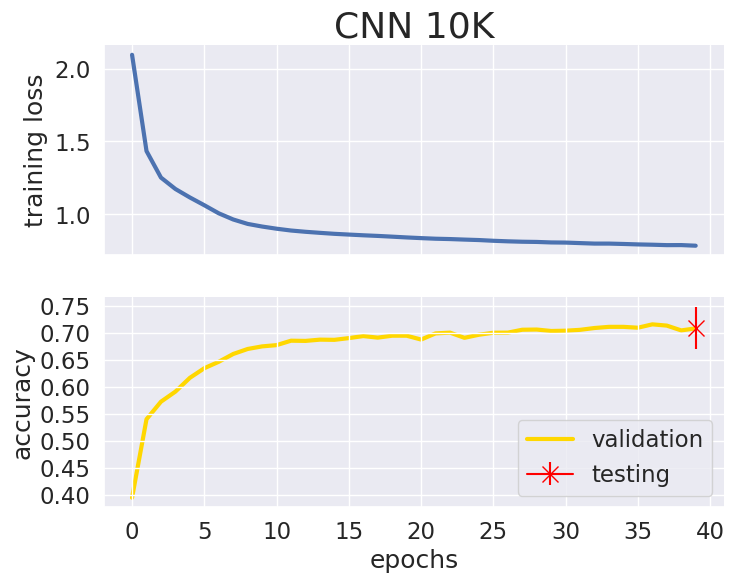

In [152]:
## VISUALIZATION

# Plot training loss and validation accuracy throughout the training epochs
import seaborn as sns
sns.set(style = 'darkgrid', font_scale = 1.5)
# plt.style.use('dark_background')

plt.figure(figsize = (8, 6))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.title("CNN 10K", fontsize = 26)
plt.tick_params(axis = 'x', labelbottom = False)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold', zorder = 0, label = "validation")
plt.ylabel("accuracy")
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel("epochs")
plt.errorbar(epochs - 1, test_accuracy.numpy(), batch_acc.std(), c = 'red', fmt = '-x', markersize = 12, linewidth = 1.5, zorder = 10, label = 'testing')
# plt.axhline(0.85, c = 'grey', linewidth = 1, linestyle = '--', zorder = 5, label = "85%")
plt.legend(loc = 'lower right')

sns.despine()